<a href="https://colab.research.google.com/github/jarrelg/ENDG-511-Final-Project/blob/main/ENDG_511_Final_Project_Fayez_%26_Jarrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENDG 511 Final Project**
# **Real-Time Clothing Recognition for the Visually Impaired and IoT Devices**
# Authors: Fayez Khan (30107199) and Jarrel Gumpal (30069206)


## Problem Statement
This project aims to develop a camera-based clothing recognition machine learning model capable of classifying essential clothing features, including garment type (e.g., shirts, pants, sweaters), color (e.g., red, white, black), fabric shade (light or dark), and more. The system will help users properly segregate clothing batches, ensuring effective washing and preventing damage to all articles of clothing. Additionally, the developed model can be further integrated into robotic aids to automate specific laundry tasks, such as initial clothing separation and folding, enhancing accessibility and independence for visually impaired individuals.

## Objectives
**Minimal Achievable:**
* Detect and identify **light-shaded, dark-shaded, and white** clothing using a pre-trained model.

* Two outputs of the classifier: “Light” or “Dark”.

**Advanced:**
* Improve detection of clothing/article type
 * Shirts, Sweaters, Jackets, Pants, Denim Jeans, Shorts, Socks, Undergarments
* Include detection of clothing features specifically suitable for modern washing machine modes
 * Normal Wash
 * Heavy-Duty
 * Delicates
* Include classification of how affected certain items are:
 * Heavily Wrinkled (Perm-Press)
 * Deep Stains on Whites (Bleach Wash)


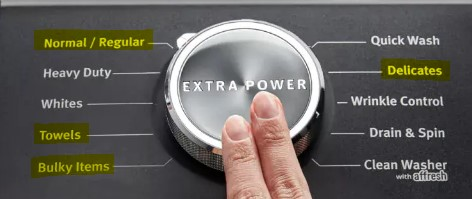

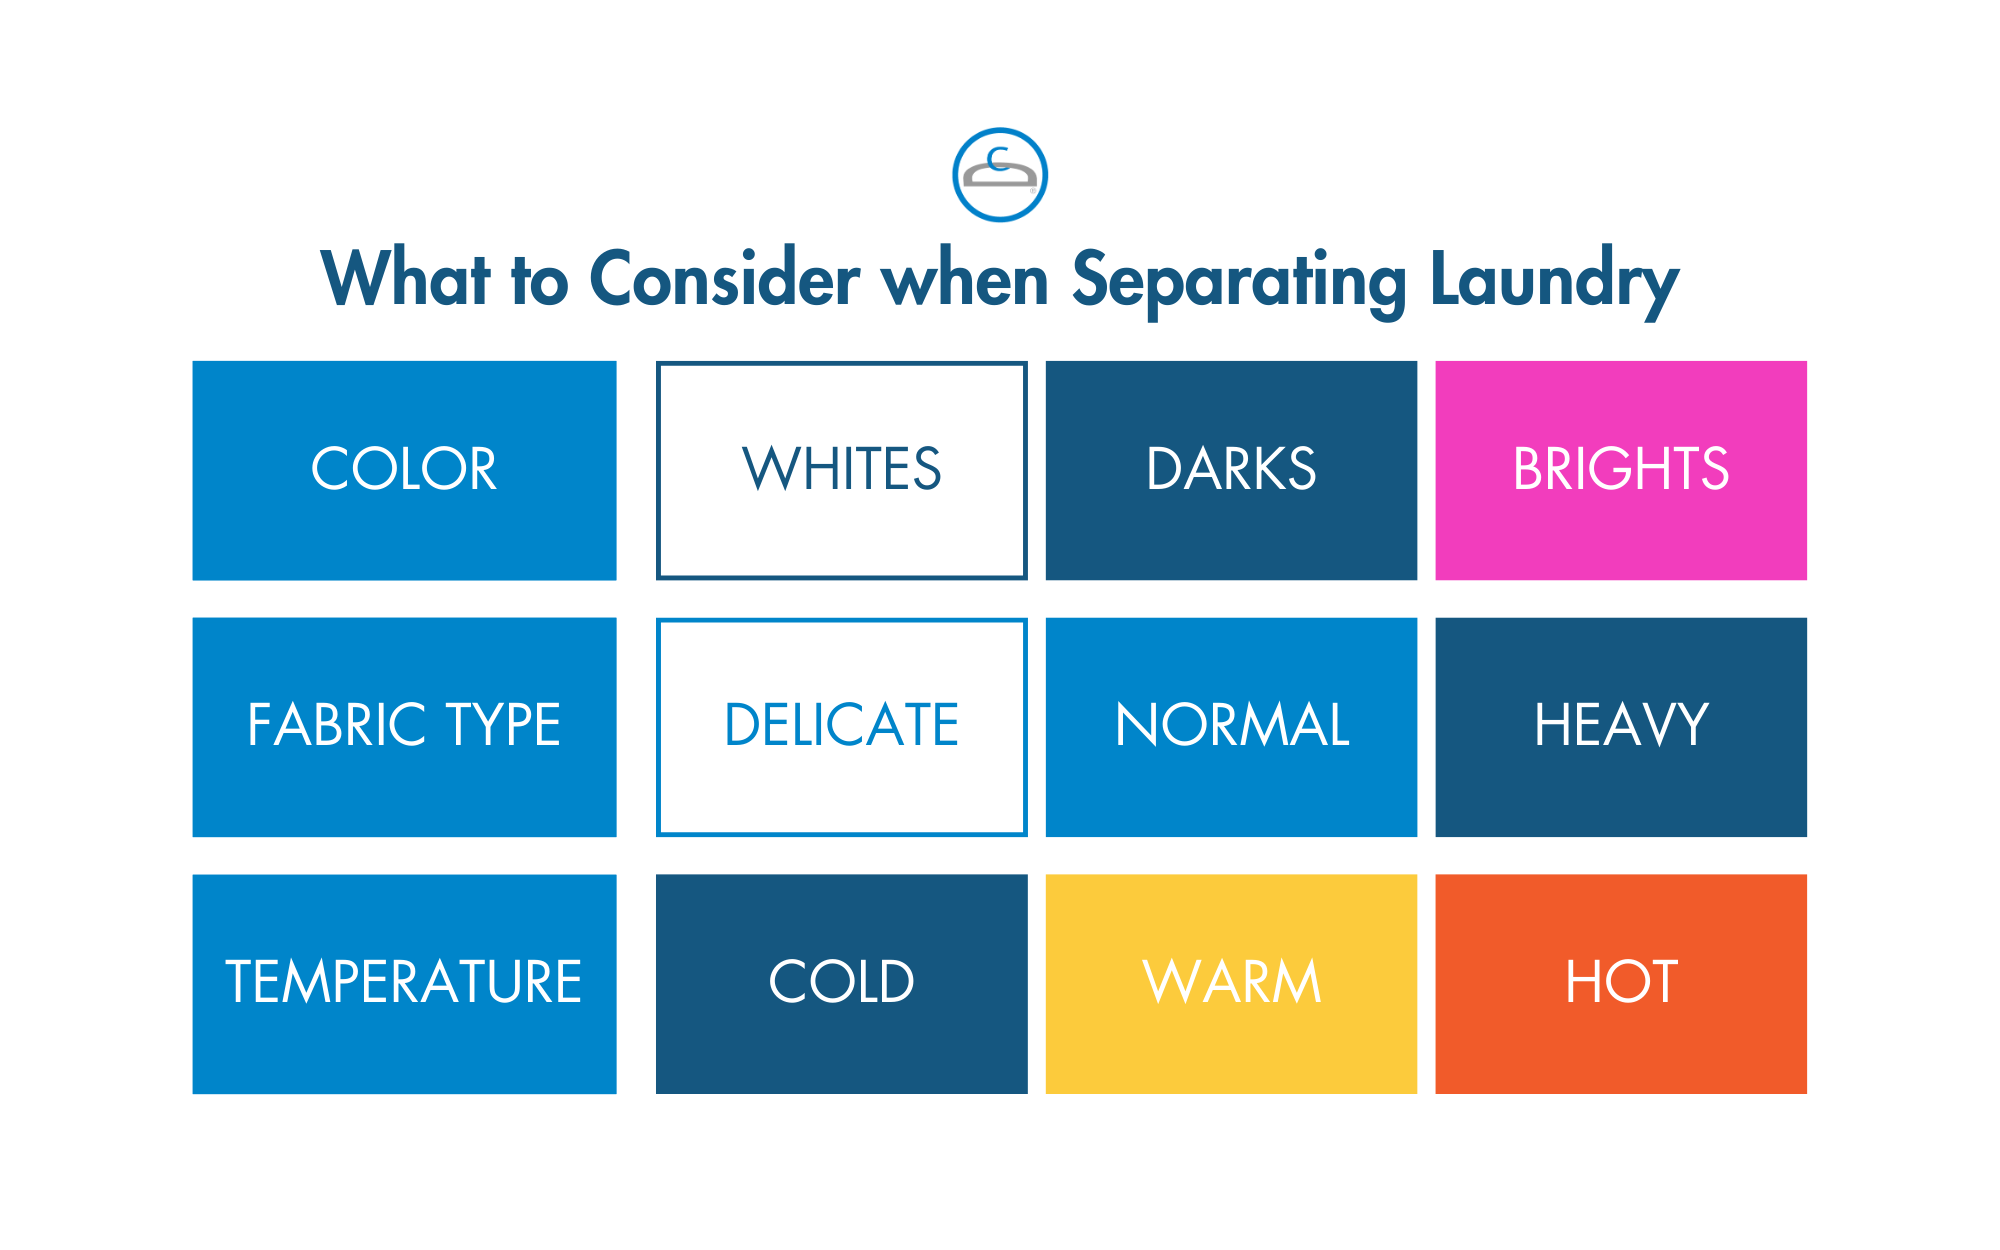
https://cdonepricecleaners.com/how-to-separate-laundry-and-sort-clothes/

# **Minimum Achievable: Light & Dark Classification**

# Importing Modules:

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


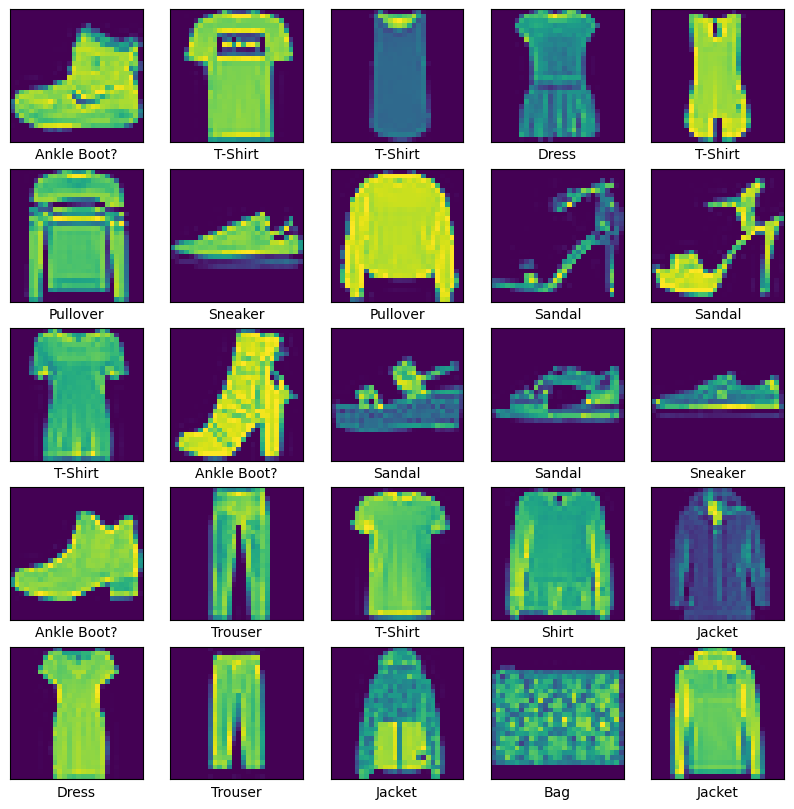

In [ ]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Jacket',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot?']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [79]:
! pip install kaggle

In [83]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [80]:
!cp /content/drive/MyDrive/511projectdata/kaggle.json ~/.kaggle/kaggle.json

In [81]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip install torch==2.0.1 torchvision==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [70]:
!pip install numpy

Found 7510 files belonging to 15 classes.
Using 6008 files for training.
Found 7510 files belonging to 15 classes.
Using 1502 files for validation.


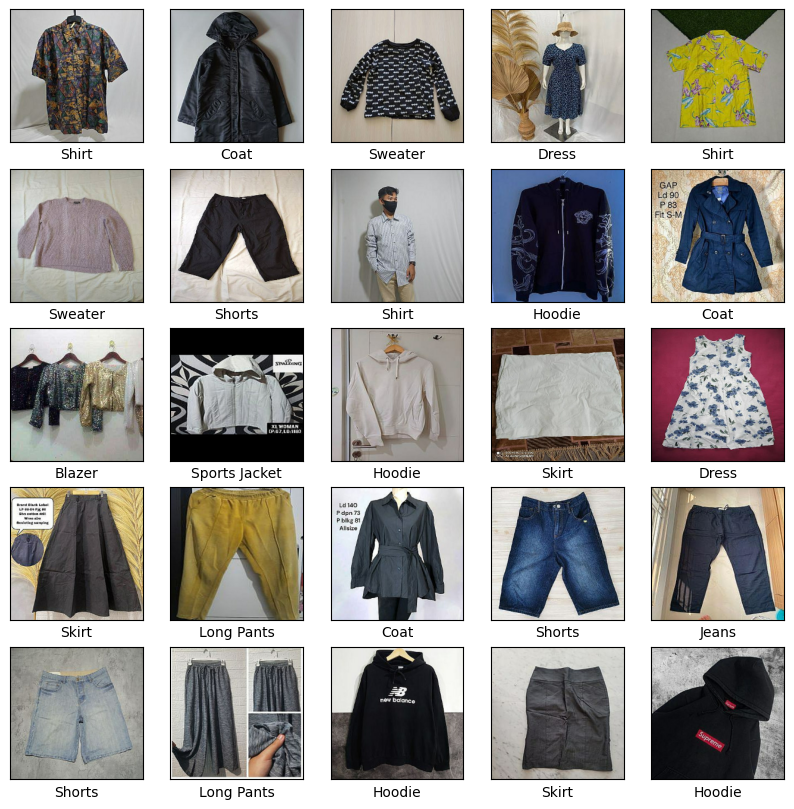

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Mount Google Drive
#from google.colab import drive

#drive.mount('/content/drive')

# Define dataset directory
data_dir = '/content/drive/MyDrive/511projectdata/Clothes_Dataset'

# Define class names
class_names = ['Blazer', 'Coat', 'Denim Jacket', 'Dress', 'Hoodie', 'Jacket', 'Jeans', 'Long Pants', 'Polo', 'Shirt', 'Shorts', 'Skirt', 'Sports Jacket', 'Sweater', 'T-shirt']

# Load dataset using image_dataset_from_directory
batch_size = 32
img_size = (224, 224)

train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Visualize training images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy())
        plt.xlabel(class_names[labels[i].numpy()])
plt.show()